In [1]:
"""
Top Crime Categories, Crime Locations, Crime Counts in Various Districts(San Francisco) 
and at various hours during the day
"""

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

sfdata = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates=['Date'])
sfdata['Year'] = sfdata['Date'].map(lambda x:x.year)
sfdata['Month'] = sfdata['Date'].map(lambda x: x.month)
sfdata['Time1'] = sfdata['Time'].map(lambda x: re.split(":",x)[0])
# print sfdata.Time1

# print np.histogram(sfdata['Time'], bins=24, range=None, normed=False, weights=None, new=None)
# monthly_events = sfdata[['Month','Category']].groupby(['Month']).count()
# monthly_events.plot(kind='bar', figsize=(6, 6))
# plt.savefig('monthly_events.png')

/home/ssreehari10/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


"\nSome of the code had to be re-written as I had accidentally erased the initial ipython notebook from the system.\n\nplot_top_crimes(sfdata, 'Time1', 'CrimeAtVariousHoursOfTheDay', 'crimevstime')\nplot_top_crimes(sfdata, 'PdDistrict', 'CrimeCountsInVariousDistricts', 'distrcount')\nplot_top_crimes(sfdata, 'Category', 'topCrimeCategories', 'topCrimes') # Use this with sort to produce clean o/p\nplot_top_crimes(sfdata, 'Address', 'topCrimeLocations', 'topcrimespots', items=30) # Change items to get cleaner o/ps\n"

In [35]:

def plot_bar(df, title, filename):
    p = (
        'Set2', 'Paired', 'colorblind', 'husl',
        'Set1', 'coolwarm', 'RdYlGn', 'spectral'
    )
    
    color = sns.color_palette(np.random.choice(p), len(df))
    bar   = df.plot(kind='barh',   # Changed to 'barh' to produce all the horizontal bar graphs
                    title=title,
                    fontsize=8,
                    figsize=(12,8),
                    stacked=False,
                    width=1,
                    color=color,
    )

    bar.figure.savefig(filename)

    plt.show()
    
def plot_top_crimes(df, column, title, fname, items=0):
    by_col         = df.groupby(column)
    col_freq       = by_col.size()

    col_freq.sort_values(ascending=True, inplace=True) # Uncomment to display in sorted order; ascending=False for reverse order
    plot_bar(col_freq[slice(-1, - items, -1)], title, fname)

"""
plot_top_crimes(sfdata, 'Time1', 'CrimeAtVariousHoursOfTheDay', 'crimevstime')
plot_top_crimes(sfdata, 'PdDistrict', 'CrimeCountsInVariousDistricts', 'distrcount')
plot_top_crimes(sfdata, 'Category', 'topCrimeCategories', 'topCrimes') # Use this with sort to produce clean o/p
plot_top_crimes(sfdata, 'Address', 'topCrimeLocations', 'topcrimespots', items=30) # Change items to get cleaner o/ps
"""

"\nplot_top_crimes(sfdata, 'Time1', 'CrimeAtVariousHoursOfTheDay', 'crimevstime')\nplot_top_crimes(sfdata, 'PdDistrict', 'CrimeCountsInVariousDistricts', 'distrcount')\nplot_top_crimes(sfdata, 'Category', 'topCrimeCategories', 'topCrimes') # Use this with sort to produce clean o/p\nplot_top_crimes(sfdata, 'Address', 'topCrimeLocations', 'topcrimespots', items=30) # Change items to get cleaner o/ps\n"

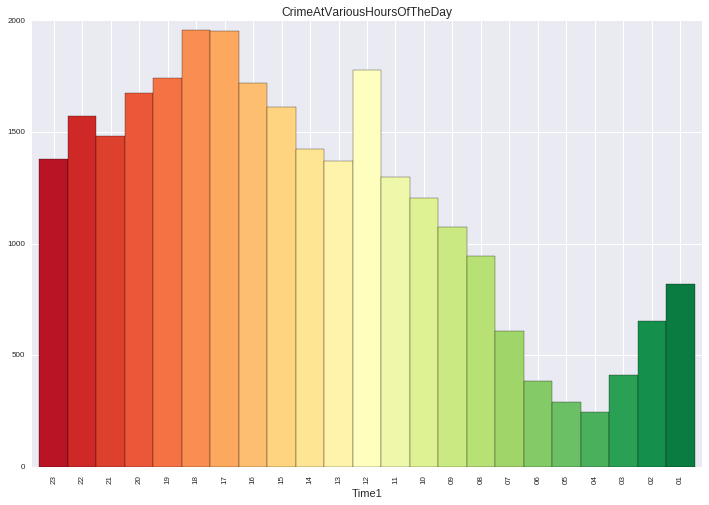

In [7]:
"""
Crime at various hours during the day:

The numbers on the horizontal axis in the above graph 
denote the hour of the day as seen on a 24 hour clock. 

In general, the majority of crimes have been reported from  4 pm to 6 pm. 
A large number of incidents have been reported between 8 and 9 pm as well as between 2 and 3 pm. 

An interesting observation is that a surprisingly large number of crimes have been 
reported between 11 am and 12 pm.
"""
%matplotlib inline
plot_top_crimes(sfdata, 'Time1', 'CrimeAtVariousHoursOfTheDay', 'crimevstime')

/home/ssreehari10/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


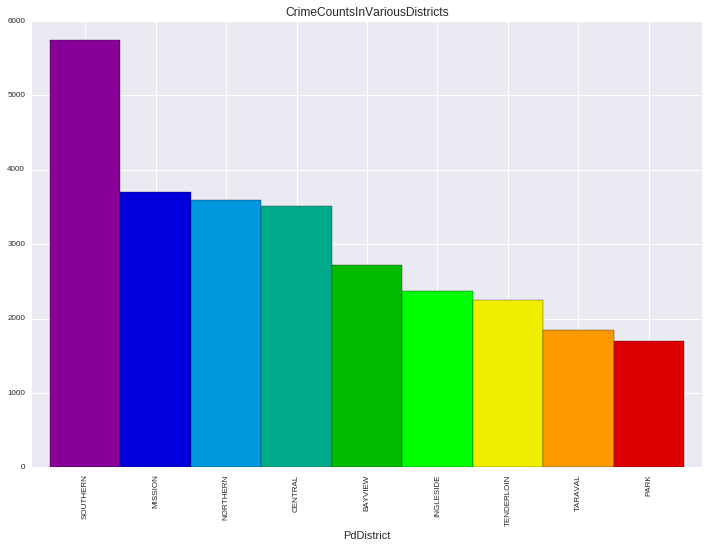

In [9]:
"""
Crime counts in various districts in San Francisco: 

On analyzing the number of crime incidents across various districts in San Fransico,
we find that Richmond district has the lowest number of reported incidents while 
Southern District has the highest number. 

Southern District has over 1500 reported incidents more than that reported at Mission District, 
which has the second highest number.
"""

plot_top_crimes(sfdata, 'PdDistrict', 'CrimeCountsInVariousDistricts', 'distrcount')

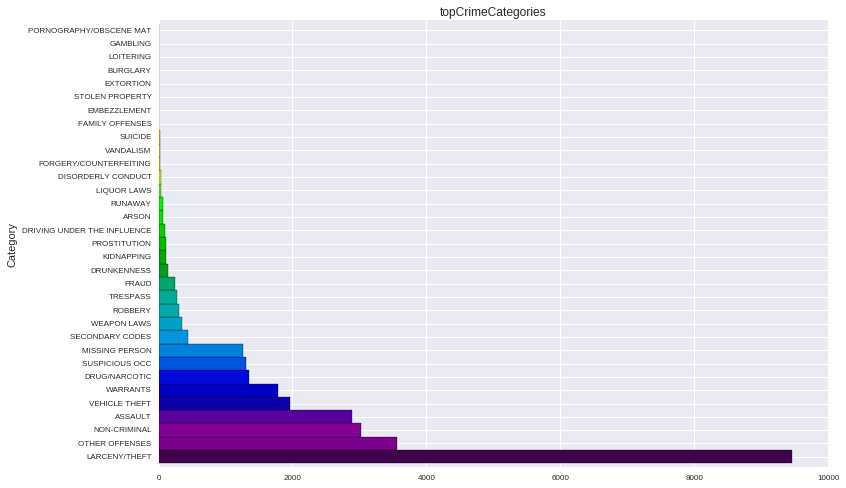

In [22]:
"""
Top Crime Categories in San Fransico:

It is evident that most of the reported incidents, i.e., over 9000 cases, 
in San Francisco are cases of larceny and theft. 
Also, over 2000 non-criminal offenses and over 2000 assaults were reported. 

Interestingly, the number of burglary cases, bribery cases and suicide cases
reported were zero or close to zero.
"""

plot_top_crimes(sfdata, 'Category', 'topCrimeCategories', 'topCrimes') 
# Use this with (descending) sort to produce clean o/p

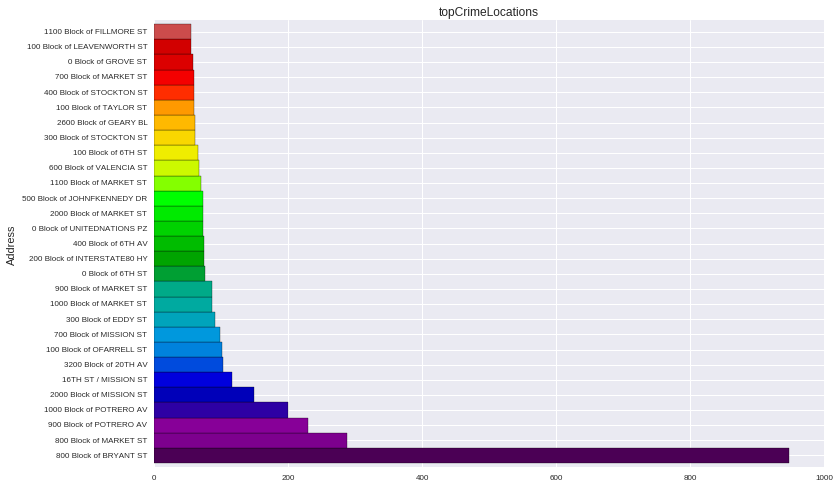

In [34]:
"""
Top Crime Locations:


It was interesting to note that crime was more prevalent in certain neighborhoods than in others. 
The above graph shows that 800 Block of Bryant Street saw over 4 times the number of 
criminal incidents reported at 1000 Block of Portrero Avenue! 

Although we haven’t yet explored the following with the given dataset, 
this could have a connection with where these neighborhoods are situated, the 
majority type of jobs of the people living there, the police department’s task force at the various places, etc. 
"""

plot_top_crimes(sfdata, 'Address', 'topCrimeLocations', 'topcrimespots', items=30) # Change items to get cleaner o/ps


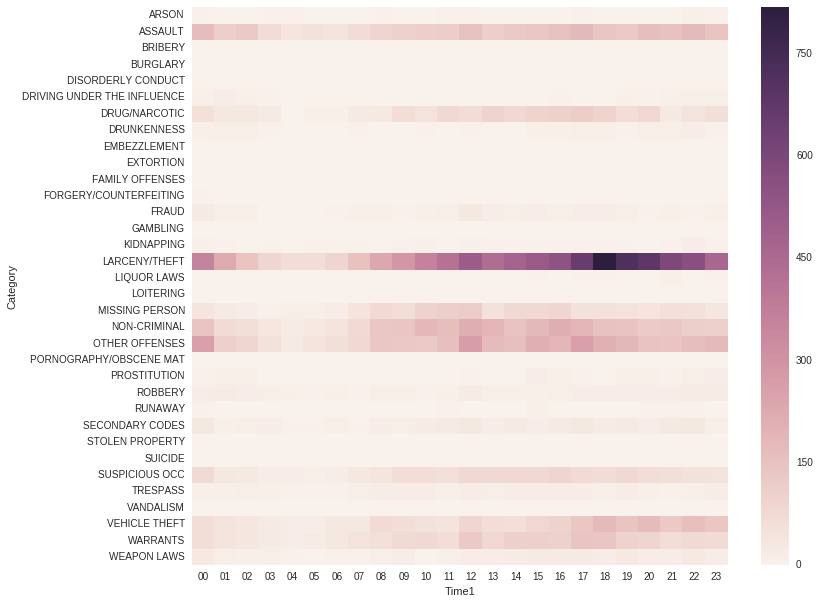

In [33]:
"""
HeatMap of the crimes reported during different hours of the day:


The above heatmap helps us analyze if there are patterns in when the reported crimes are reported 
to have taken place. 

For instance, it is evident that the cases of theft  have mostly been reported at around 5 pm to 8 pm, 
while, a major portion of cases pertaining to non-criminal offenses have been reported during the day 
between 11 am and 5 pm. 

Also, vehicle thefts are more common at night than during the day. 
Another observation is that cases of assault seem to get reported throughout the day, 
with the numbers increasing after nightfall.

"""

# Plot a heatmap of category vs Time
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

pivotTable = pd.pivot_table(sfdata[['Category', 'Time1']], index='Category',columns='Time1', aggfunc=len, fill_value=0)
# print pivotTable.info()
# print pivotTable.describe
sns.heatmap(pivotTable)

plt.yticks(rotation=0)
# plt.Figure(figsize=(10,100))
plt.show()

In [1]:
# ------------- IGNORE THIS ------------------
# Random heat map trials for reference

# import numpy as np 
# from pandas import DataFrame
# import matplotlib.pyplot as plt

# Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
# Cols = ['A', 'B', 'C', 'D']
# df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

# plt.pcolor(df)
# plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
# plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
# plt.show()


# uniform_data = np.random.rand(10, 12)
# sns.heatmap(uniform_data)